# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [34]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [35]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n)

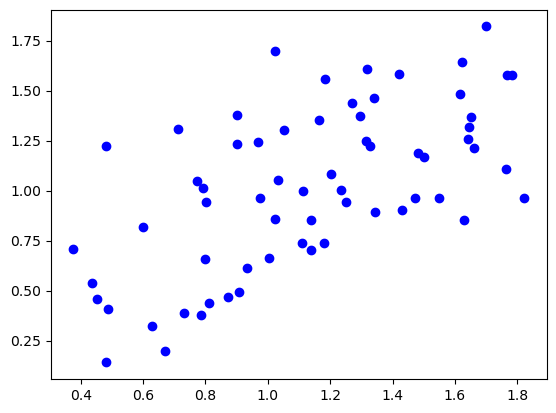

In [36]:
plt.scatter(x.T[0],y, c = "blue")

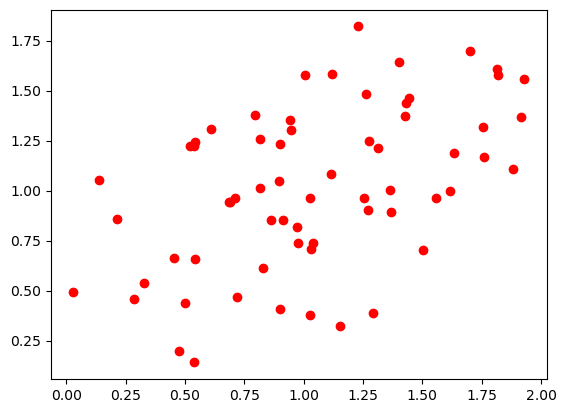

In [37]:
plt.scatter(x.T[1],y, c = "red")

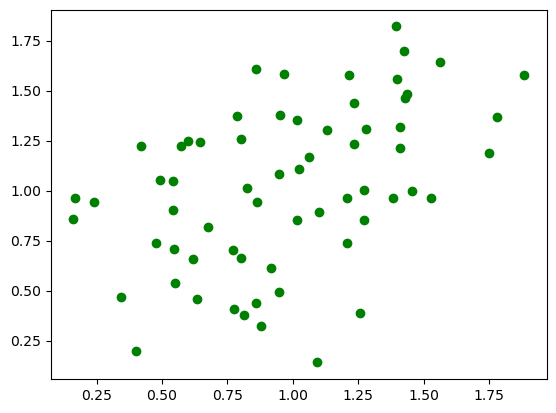

In [38]:
plt.scatter(x.T[2],y, c = "green")

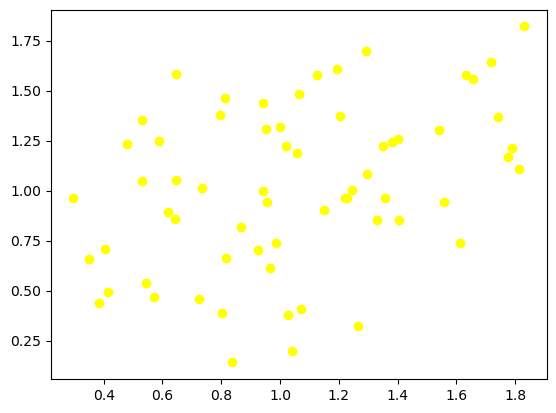

In [39]:
plt.scatter(x.T[3],y, c = "yellow")

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

$\beta = (X^T X)^{-1} Y^T X$

In [40]:
left  = np.linalg.inv(np.dot(x.T, x)) # Just showing the by hand method
right = np.dot(y.T, x)
np.dot(left, right)

array([ 0.49650196,  0.15756539,  0.06928155, -0.01402025,  0.23798109])

In [41]:
beta = np.dot(left, right)
beta

array([ 0.49650196,  0.15756539,  0.06928155, -0.01402025,  0.23798109])

In [42]:
test = np.linalg.lstsq(x,y,rcond=None)[0] # Got a warning that didn't entirely make sense; remove rcond to see it
test

array([ 0.49650196,  0.15756539,  0.06928155, -0.01402025,  0.23798109])

In [43]:
y_pred = np.dot(x, beta) # I know the question implies a single column but this math makes 5
y_pred

array([0.75210303, 0.8002714 , 0.84140595, 0.78093716, 0.79672387,
       0.65795759, 0.62496426, 0.8811053 , 0.53629223, 0.83108435,
       0.61943274, 0.54008205, 0.66027305, 0.74819913, 0.79338409,
       0.75838359, 0.77264783, 0.96211602, 0.77508068, 0.88108606,
       1.12434503, 0.80657736, 0.85111509, 0.57339169, 0.72314439,
       0.82925567, 0.90589558, 1.18766032, 1.02656337, 0.98906336,
       1.21869818, 1.00364501, 0.86525079, 1.17049904, 1.0588461 ,
       0.76255208, 1.13650141, 1.24490559, 1.14399017, 1.17835633,
       1.25947642, 1.00447843, 1.08103792, 1.04928551, 1.31823608,
       1.09388428, 1.21782605, 1.32338369, 1.13292071, 1.1658644 ,
       1.30896043, 1.34915632, 0.9668831 , 1.22130272, 1.47021375,
       1.34649749, 1.41422782, 1.39031924, 1.3373197 , 1.34192362,
       1.39123121, 1.20231874, 1.45639   , 1.45937604])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

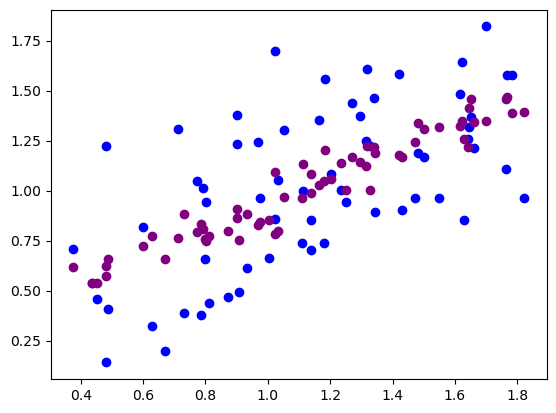

In [44]:
plt.scatter(x.T[0], y, c = "blue")
plt.scatter(x.T[0], y_pred, c = "purple")

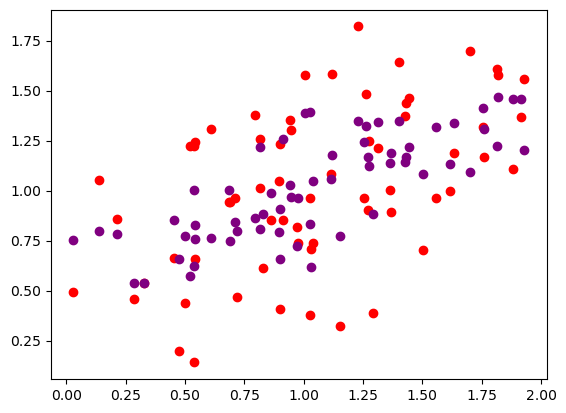

In [45]:
plt.scatter(x.T[1], y, c = "red")
plt.scatter(x.T[1], y_pred, c = "purple")

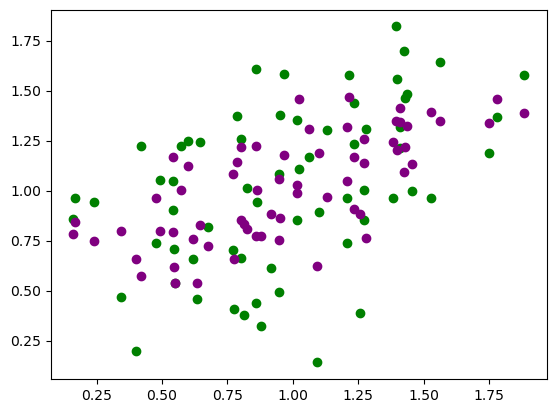

In [46]:
plt.scatter(x.T[2], y, c = "green")
plt.scatter(x.T[2], y_pred, c = "purple")

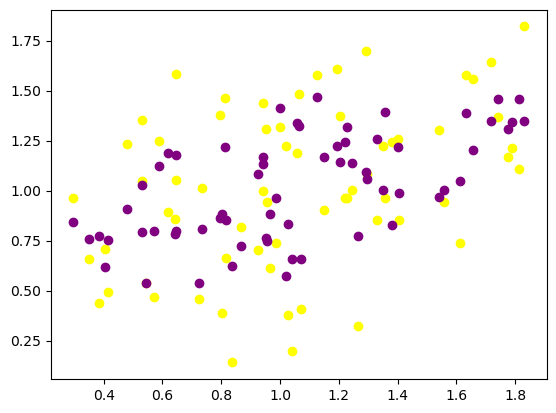

In [47]:
plt.scatter(x.T[3], y, c = "yellow")
plt.scatter(x.T[3], y_pred, c = "purple")

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [48]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [49]:
columns = ['Income', 'Limit', "Balance", "Education"]
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.33000e+02, 1.10000e+01, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 9.03000e+02, 1.50000e+01, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 5.80000e+02, 1.10000e+01, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.38000e+02, 1.20000e+01, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 0.00000e+00, 1.30000e+01, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 9.66000e+02, 7.00000e+00, 1.00000e+00]])

In [50]:
Y = credit['Rating']
Y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [51]:
Left  = np.linalg.inv(np.dot(X.T, X))
Right = np.dot(Y.T, X)
np.dot(Left, Right)

array([ 1.34036346e-01,  6.26373011e-02,  1.48796968e-02, -3.43052578e-01,
        4.91302144e+01])

In [52]:
Beta = np.dot(Left, Right)
Beta

array([ 1.34036346e-01,  6.26373011e-02,  1.48796968e-02, -3.43052578e-01,
        4.91302144e+01])

In [53]:
Y_pred = np.dot(X, Beta)
Y_pred

array([278.17761811, 487.85686136, 511.16502905, 674.96680224,
       362.79163541, 577.61561585, 263.0635652 , 514.19086427,
       257.5523597 , 499.34831911, 582.14720802, 127.77545175,
       393.04857285, 501.55806736, 255.57807578, 204.8362672 ,
       283.11733697, 328.57804889, 465.82126298, 482.31153598,
       226.48079068, 462.20856298, 213.19296052, 385.48187672,
       155.47798223, 326.29527451, 287.49777934, 338.98316868,
       936.47734621, 412.30810878, 419.73534685, 218.70826299,
       561.43354841, 164.46763043, 212.76660943, 214.60414135,
       469.50962871, 472.28062691, 299.40460335, 268.06298717,
       258.15033424, 556.14400174, 354.6594563 , 455.72148363,
       463.88996014, 544.32210569, 380.60485023, 339.37361198,
       191.01119404, 350.10961244, 383.23870869, 299.33814009,
       400.78019142, 404.5003749 , 141.99123487, 162.66795394,
       353.27423029, 355.8734942 , 267.6188798 , 389.75404498,
       382.00657332, 243.63998293, 155.50827969, 234.95

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

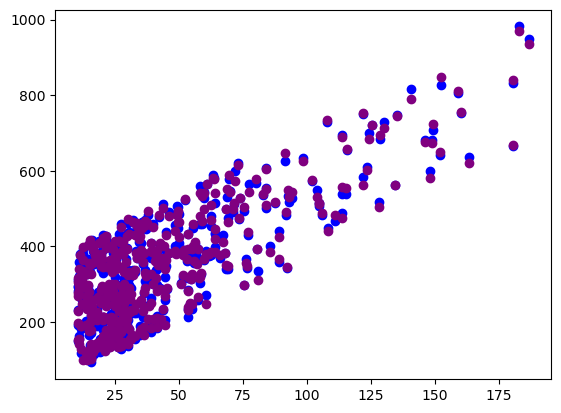

In [54]:
plt.scatter(X.T[0], Y, c = "blue")
plt.scatter(X.T[0], Y_pred, c = "purple")

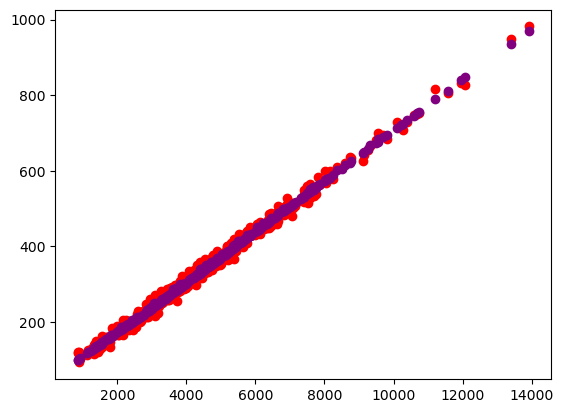

In [55]:
plt.scatter(X.T[1], Y, c = "red")
plt.scatter(X.T[1], Y_pred, c = "purple")

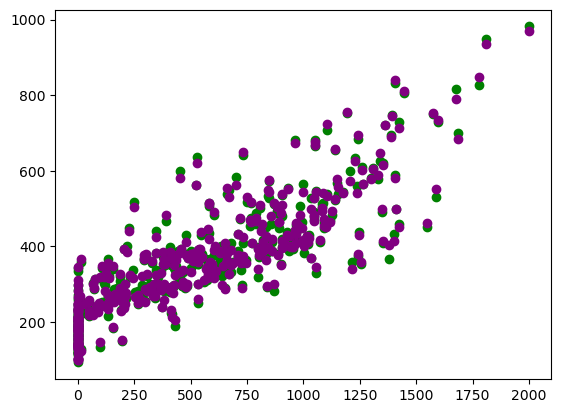

In [56]:
plt.scatter(X.T[2], Y, color = "green")
plt.scatter(X.T[2], Y_pred, c = "purple")

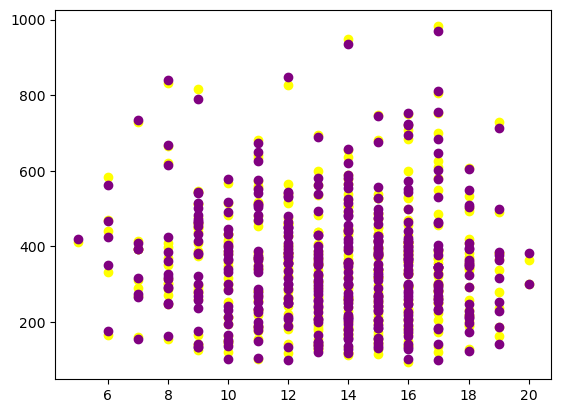

In [57]:
plt.scatter(X.T[3], Y, color = "yellow")
plt.scatter(X.T[3], Y_pred, c = "purple")